Data Cleaning with the Visualization and also Preprocess the Data by using image_dataset_from_directory

In [36]:
import os
from PIL import Image

def clean_the_data(files):
    cleaned = 0 
    for temp, _ , file in os.walk(files):
        for f in file:
            paths = os.path.join(temp,f)
            try:
                img = Image.open(paths)
                img.verify()
            except Exception as e:
                print("Cleaning corrupt images from the files")
                os.remove(paths)
                cleaned += 1
    print("Cleaned the images")

clean_the_data("dataset/train")    
clean_the_data("dataset/test")    
clean_the_data("dataset/valid")    

Cleaned the images
Cleaned the images
Cleaned the images


In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#Lets define some constants to be used in preprocessing
img_size=(64,64)
batch_size=32

trained_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/train",seed=42,image_size=img_size,batch_size=batch_size)
valid_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/valid",seed=42,image_size=img_size,batch_size=batch_size)
tested_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/test",seed=42,image_size=img_size,batch_size=batch_size)

Found 30249 files belonging to 2 classes.
Found 6300 files belonging to 2 classes.
Found 6299 files belonging to 2 classes.


Visualization for the Train_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

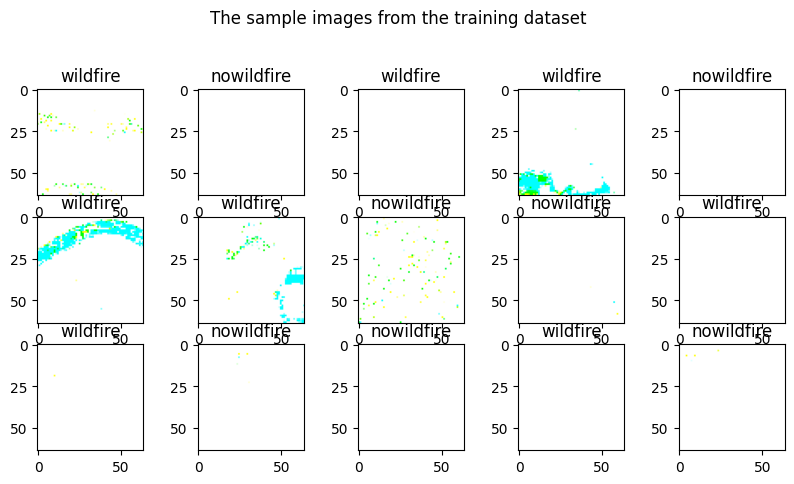

In [33]:
class_name=trained_data.class_names

#It shows us the inight whether the images data are getting loaded correctly or not 
plt.figure(figsize=(10,8))
for img,lab in trained_data.take(3):
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i].numpy())
        plt.title(class_name[lab[i]])
plt.suptitle("The sample images from the training dataset")
plt.show()

Defining the model

In [28]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten #type:ignore
from tensorflow.keras.models import Sequential #type:ignore

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.4),
    Dense(2,activation='softmax')
])

c:\Users\Sarthak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the Model

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,330 (2.48 MB)

 Trainable params: 651,330 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [35]:
history = model.fit(trained_data,validation_data=valid_data,epochs=5)

Epoch 1/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 101s 104ms/step - accuracy: 0.8842 - loss: 0.2984 - val_accuracy: 0.9283 - val_loss: 0.1852
Epoch 2/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 88s 93ms/step - accuracy: 0.9100 - loss: 0.2329 - val_accuracy: 0.9327 - val_loss: 0.1810
Epoch 3/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 89s 93ms/step - accuracy: 0.9280 - loss: 0.1942 - val_accuracy: 0.9430 - val_loss: 0.1562
Epoch 4/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step - accuracy: 0.9373 - loss: 0.1754 - val_accuracy: 0.9465 - val_loss: 0.1482
Epoch 5/5
946/946 ━━━━━━━━━━━━━━━━━━━━ 96s 102ms/step - accuracy: 0.9377 - loss: 0.1715 - val_accuracy: 0.9510 - val_loss: 0.1427


Tracking the Performance by plotting Training and Validation Accuracy & Loss

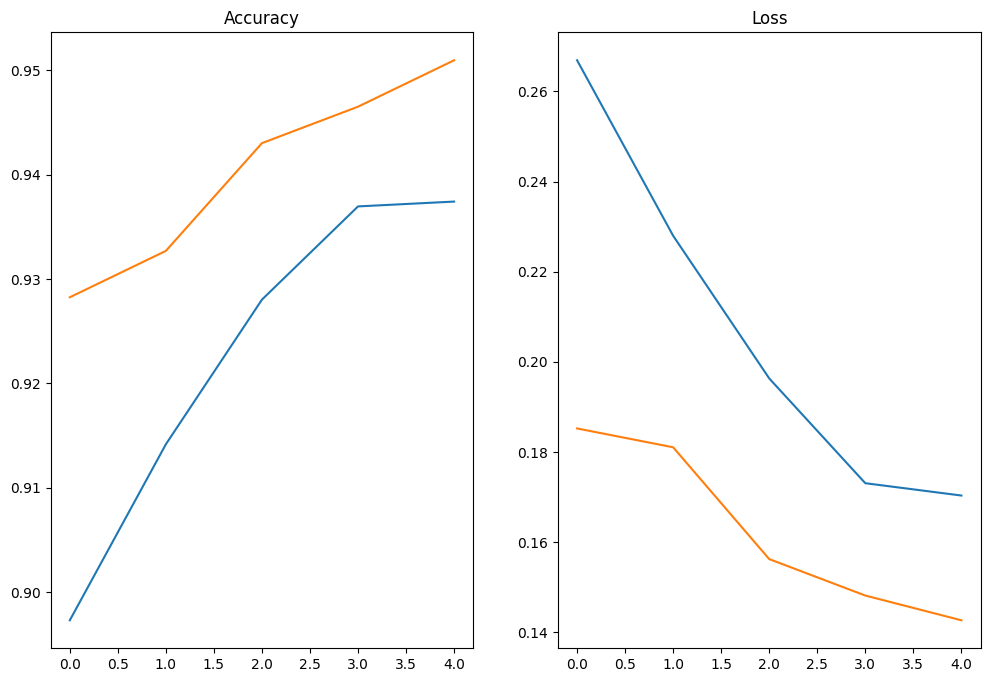

In [41]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Loss")

plt.show()

The Evaluation on the Test data

In [48]:
test_loss,test_acc=model.evaluate(tested_data)

print(f"Test accuracy : {test_acc:.5f}")
print(f"Test Loss : {test_loss:.5f}")

print(f"In percentage we can say it has Test Accuracy of {test_acc * 100:.2f}%  and Test Loss of {test_loss * 100:.2f}% ")

197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9576 - loss: 0.1204
Test accuracy : 0.95539
Test Loss : 0.12634
In percentage we can say it has Test Accuracy of 95.54%  and Test Loss of 12.63% 
